<a href="https://colab.research.google.com/github/XianPearl/CricketShotClassification/blob/main/CricketShots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import zipfile
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import random as rndm
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2

**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
zip_kaggle = zipfile.ZipFile('/content/drive/MyDrive/cricket-shots-dataset.zip', 'r')
zip_kaggle.extractall('/cricket-shot-dataset')
zip_kaggle.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Ignoring Warnings**

In [ ]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [ ]:
os.listdir("/cricket-shot-dataset/data")

['sweep', 'pullshot', 'drive', 'legglance-flick']

In [ ]:
pullshot="/cricket-shot-dataset/data/pullshot"
sweep="/cricket-shot-dataset/data/sweep"
drive="/cricket-shot-dataset/data/drive"
legglance="/cricket-shot-dataset/data/legglance-flick"

**Dataset Joining for training**

In [ ]:
X=[]
Z=[]

def assign_label(img, short_type):
    return short_type

def add_shorts_to_train_data(short_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img,short_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (150,150))
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
add_shorts_to_train_data("pullshot",pullshot)
len(X)

100%|██████████| 1260/1260 [00:04<00:00, 277.80it/s]


1260

In [ ]:
add_shorts_to_train_data("sweep",sweep)
len(X)

100%|██████████| 1120/1120 [00:03<00:00, 315.19it/s]


2380

In [ ]:
add_shorts_to_train_data("drive",drive)
len(X)

100%|██████████| 1224/1224 [00:04<00:00, 256.18it/s]


3604

In [ ]:
add_shorts_to_train_data("legglance-flick",legglance)
len(X)

100%|██████████| 1120/1120 [00:15<00:00, 72.43it/s]


4724

**Visualizing dataset**

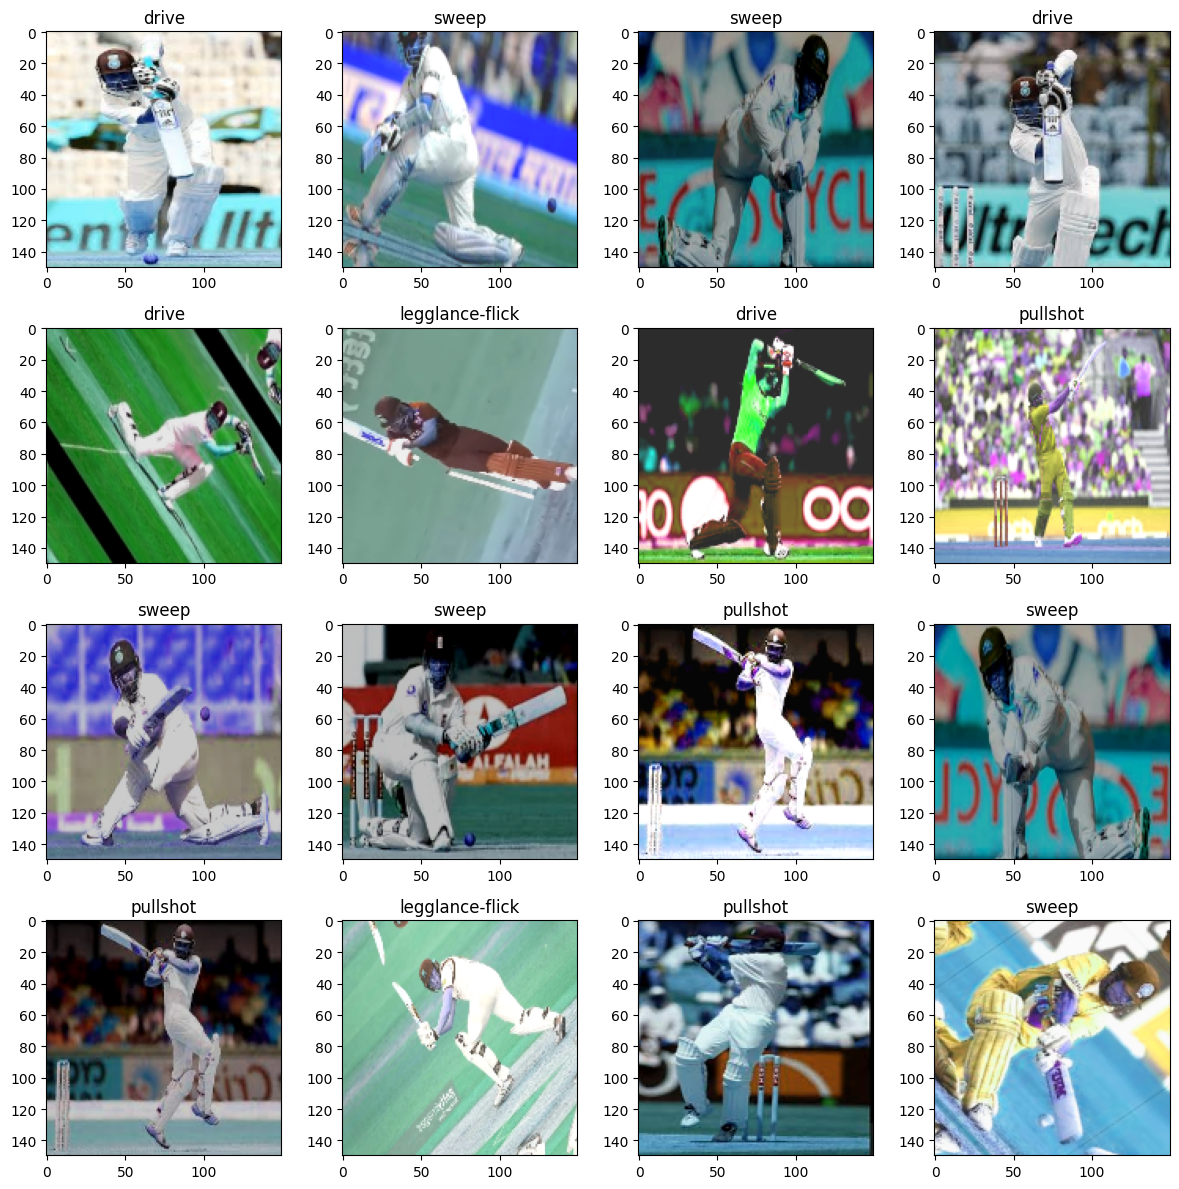

In [ ]:
f,ax = plt.subplots(4,4)
f.set_size_inches(12,12)
n=len(Z)

for i in range(4):
    for j in range(4):
        idx = rndm.randint(0,n)
        ax[i,j].imshow(X[idx])
        ax[i,j].set_title(Z[idx])

plt.tight_layout()

**Pre-processing data**

In [ ]:
# Label Encoding for the dataset
le=LabelEncoder()
Y=le.fit_transform(Z)

# Categorical Data
Y=to_categorical(Y,4)

X=np.array(X)
Y.shape

(4724, 4)

**Training and Testing**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3779, 150, 150, 3), (945, 150, 150, 3), (3779, 4), (945, 4))

**CNN Model**

In [ ]:
# Defining the parameters
num_classes = 4
batch_size = 32
epochs = 2

In [ ]:
# Building the CNN Model (Hidden Output)
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

**Visualizing CNN**

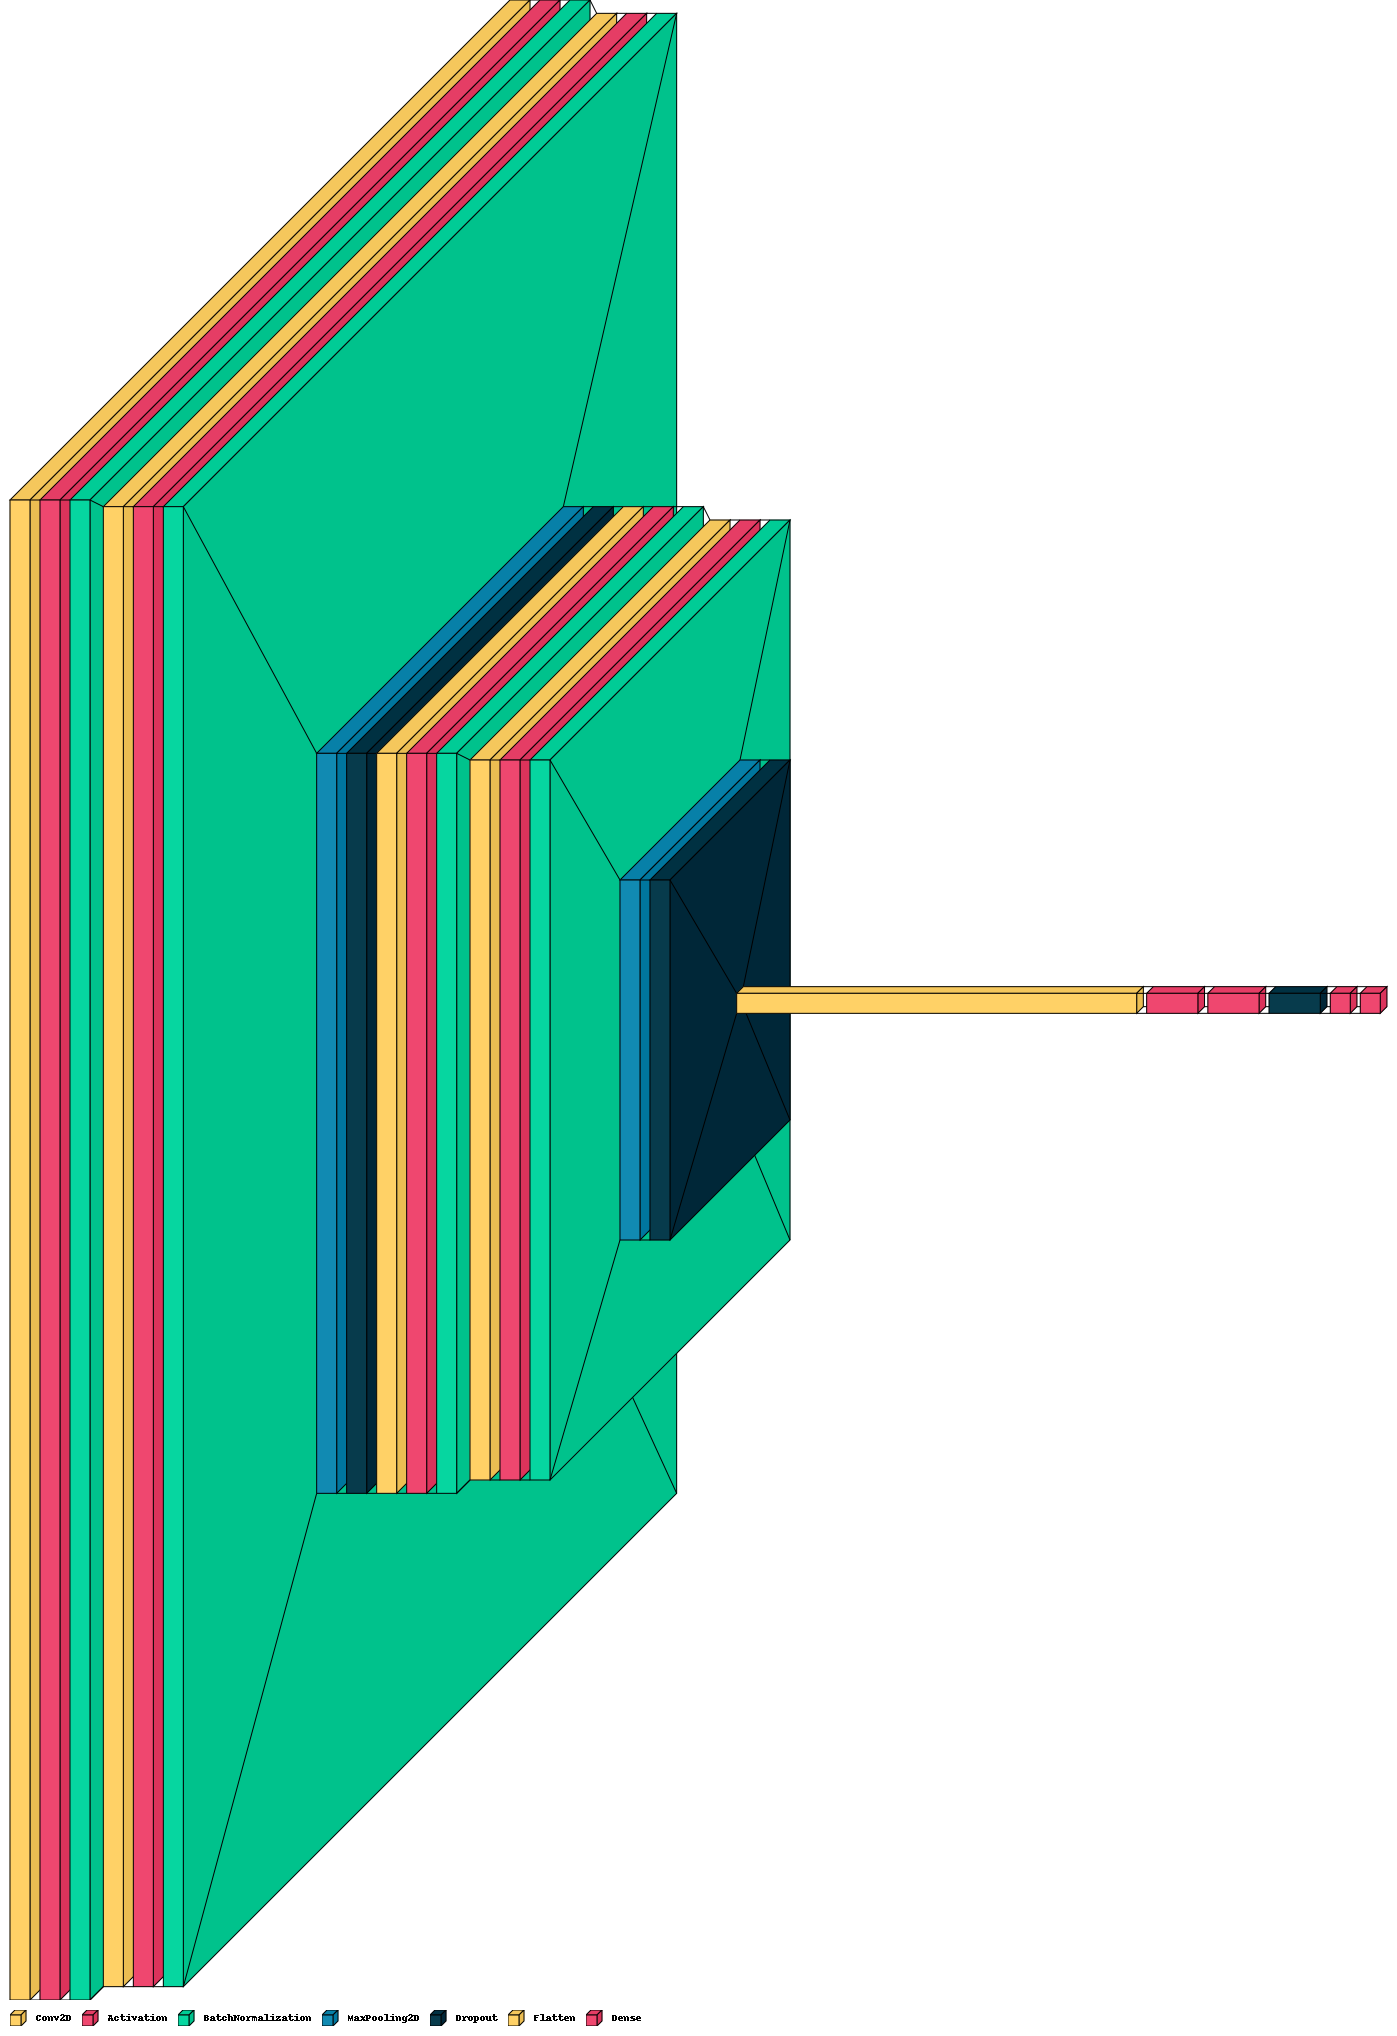

In [ ]:
!pip install visualkeras

# Visualizing our model (Hidden Input)
import visualkeras
visualkeras.layered_view(model,scale_xy=10,legend=True)

In [ ]:
# summary of the model (Hidden Input)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 activation (Activation)     (None, 150, 150, 64)      0         
                                                                 
 batch_normalization (Batch  (None, 150, 150, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 batch_normalization_1 (Bat  (None, 148, 148, 64)      256       
 chNormalization)                                       

**Compiling and Training the model**

In [ ]:
# compile (Hidden Output)
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255
epochs=40

# Training the model
history = model.fit(x_train, y_train,
            batch_size=batch_size,epochs=1,
            validation_data=(x_test, y_test),
            shuffle=True)

119/119 [==============================] - 1743s 15s/step - loss: 17.7293 - accuracy: 0.4477 - val_loss: 13.9770 - val_accuracy: 0.2455


In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

**Model Evaluation**

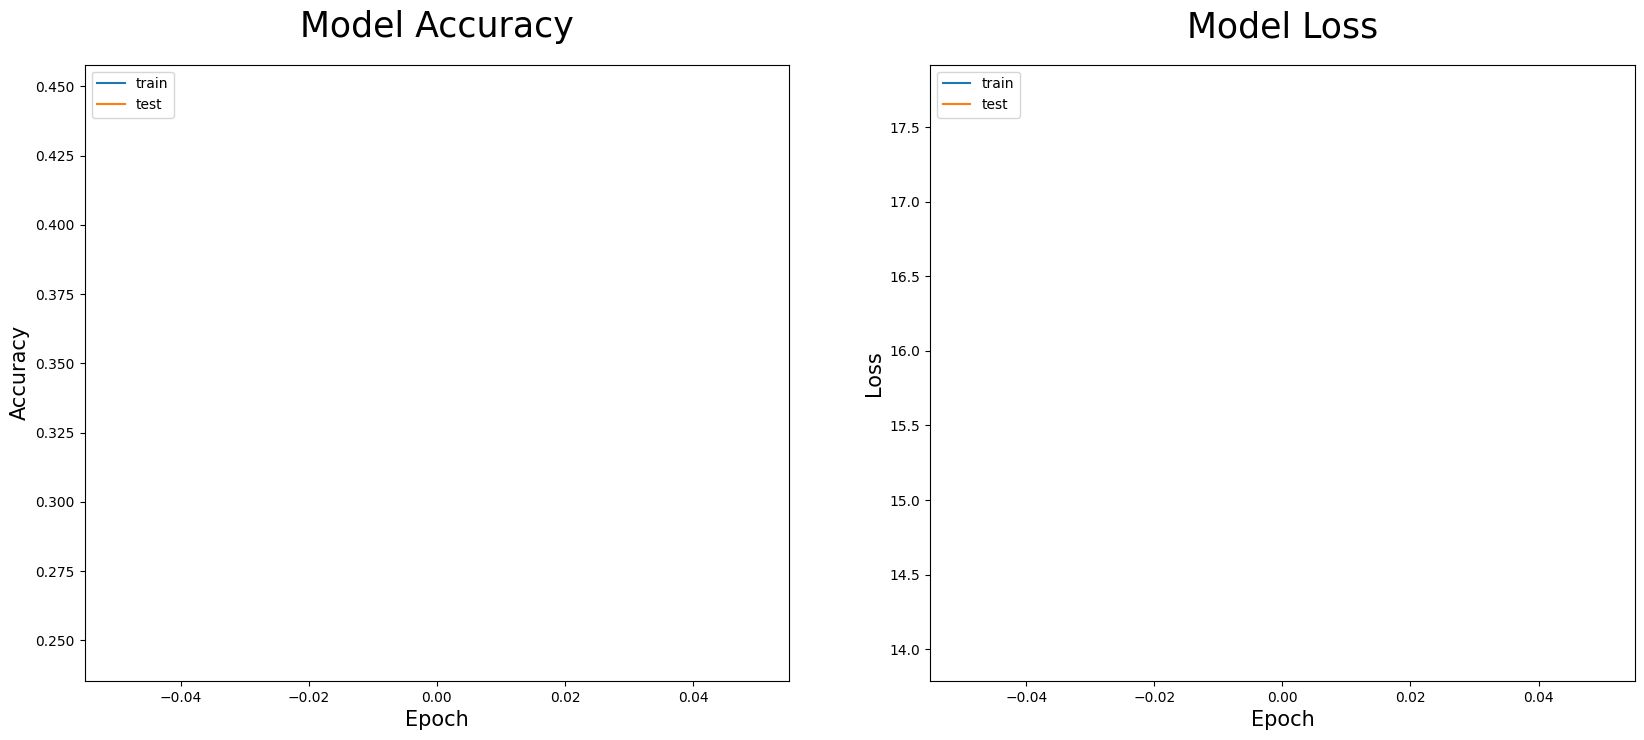

In [ ]:
# Plotting the Model Accuracy & Model Loss vs Epochs (Hidden Input)
plt.figure(figsize=[20,8])
# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Predicting using CNN**

30/30 [==============================] - 104s 3s/step


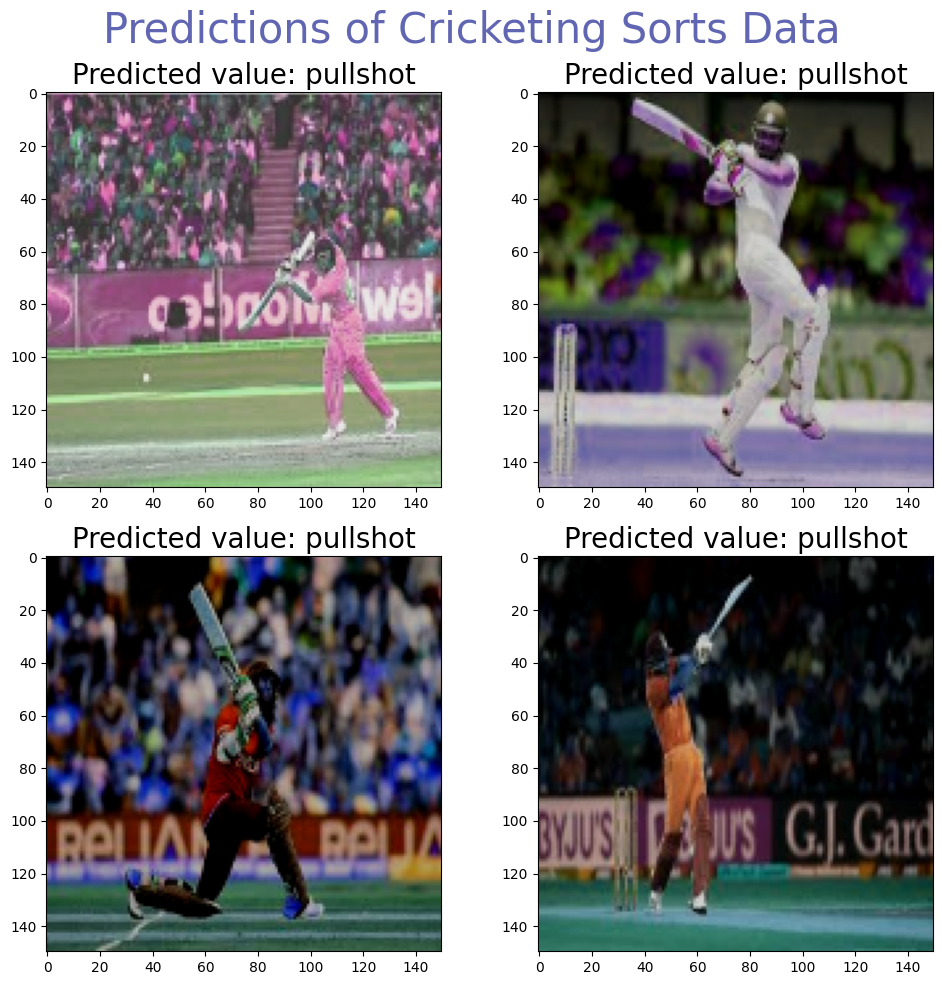

In [ ]:
predictions = model.predict(x_test)
class_names = ['pullshot', 'sweep', 'drive', 'legglance-flick']
plt.figure(figsize=[10, 10])
plt.subplot(2, 2, 1)
n = 3
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n])]),size=20)
plt.grid(False)
plt.subplot(2, 2, 2)
n = 4
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n])]),size=20)
plt.grid(False)
plt.subplot(2, 2, 3)
n = 8
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n])]),size=20)
plt.grid(False)
plt.subplot(2, 2, 4)
n = 6
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n])]),size=20)
plt.grid(False)
plt.suptitle("Predictions of Cricketing Sorts Data", size=30, color="#6166B3")
plt.tight_layout()
plt.show()